In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('cleaned_text.csv')
df.head()

,Unnamed: 0,file_id,user_id,subforum_id,num_contexts,label,text,text_con_rem,corrected_text,lemma_text
0,0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...","as of march 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet had been d...,as of march 13th 2014 the booklet have be ...
1,1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,in order to help increase the booklets downloa...,in order to help increase the booklets downloa...,in order to help increase the booklet download...
2,2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,( simply copy and paste the following text int...,simply copy and paste the following text into ...,simply copy and paste the follow text into you...
3,3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,click below for a free download of a colorfull...,click below for a free download of a colorfull...
4,4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the `` download ( 7.42 mb ) '' green ...,click on the download 742 mb green banner ...,click on the download 742 mb green bann...


In [3]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
Unnamed: 0,int64,0,10703,0.000000
file_id,object,0,10703,0.000000
user_id,int64,0,2778,0.000000
subforum_id,int64,0,21,0.000000
num_contexts,int64,0,20,0.000000
label,object,0,2,0.000000
text,object,0,10493,0.000000
text_con_rem,object,42,10479,0.003924
corrected_text,object,48,10421,0.004485
lemma_text,object,48,10420,0.004485


In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(10655, 10)

### Using a model from hugging face to get the predictions for 'corrected text' 

##### Model_name:"irlab-udc/MetaHateBERT"

In [6]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe_1 = pipeline("text-classification", model="irlab-udc/MetaHateBERT")

C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
predicted_label_normal=[]
predicted_score_normal=[]

def predictions_model_normal():

    for sent in df['corrected_text']:
        
            #Passing the 'lemma_string' into the model and making predictions
            label_and_score=pipe_1(sent)

            predicted_label_normal.append(label_and_score[0]['label'])
            predicted_score_normal.append(label_and_score[0]['score'])

            if len(predicted_label_normal)%1000==0:
                print(f'Predictions made for {len(predicted_label_normal)} items')

In [8]:
predictions_model_normal()

df['predicted_label_normal']=predicted_label_normal
df['predicted_score_normal']=predicted_score_normal
df[['text','corrected_text','label','predicted_label_normal','predicted_score_normal']].head()

Predictions made for 1000 items
Predictions made for 2000 items
Predictions made for 3000 items
Predictions made for 4000 items
Predictions made for 5000 items
Predictions made for 6000 items
Predictions made for 7000 items
Predictions made for 8000 items
Predictions made for 9000 items
Predictions made for 10000 items


,text,corrected_text,label,predicted_label_normal,predicted_score_normal
0,"As of March 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet had been d...,noHate,no hate,0.995001
1,In order to help increase the booklets downloa...,in order to help increase the booklets downloa...,noHate,no hate,0.994424
2,( Simply copy and paste the following text int...,simply copy and paste the following text into ...,noHate,no hate,0.994773
3,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,hate,hate,0.732618
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the download 742 mb green banner ...,noHate,no hate,0.992988


In [9]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_metrics(predictions_labels):
    
    # define confusion matrix
    confusion_matrix = metrics.confusion_matrix(ground_truth, predictions_labels)
    print(confusion_matrix)
    print('...........................................................................\n')
    # define and print matrix with labels
    sns.heatmap(confusion_matrix,
                annot=True,
                fmt='g',
                xticklabels=['Not Hate','Hate'],
                yticklabels=['Not Hate','Hate'])

    # display matrix
    plt.ylabel('Actual',fontsize=12)
    plt.xlabel('Prediction',fontsize=12)
    plt.show()
    print('...........................................................................\n')
    # create and print classification report
    report = classification_report(ground_truth, predictions_labels)
    print(report)

In [10]:
#True labels
ground_truth=list(df['label'].map({'noHate':0,'hate':1}))

#normal text predictions
predictions_normal=list(df['predicted_label_normal'].map({'no hate':0,'hate':1}))

[[8386 1073]
 [  90 1106]]
...........................................................................



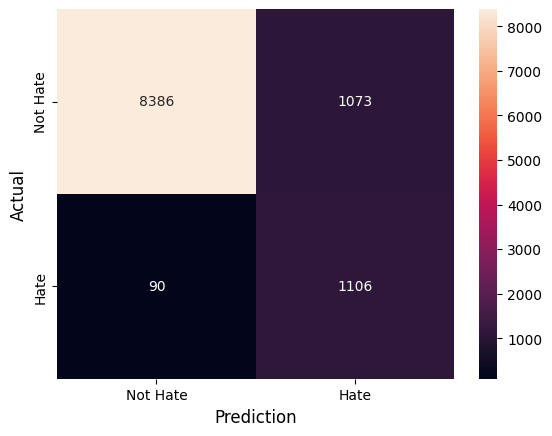

...........................................................................

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9459
           1       0.51      0.92      0.66      1196

    accuracy                           0.89     10655
   macro avg       0.75      0.91      0.80     10655
weighted avg       0.94      0.89      0.90     10655



In [11]:
calculate_metrics(predictions_normal)